
* Data Exploration
Besides exploring the usual features & labels, I also need to after find any possible correlations between such features & labels with a diabetes outcome. +The question for the latter beggs the question about what sort of correlation statistic might be used+, but let's see the data first.

In [1]:
import pandas as pd

ds = pd.read_csv('/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/week_10/diabetes.csv')

print(ds.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  




Looking it over via the output and overall in a spreadsheet application, it would seem the data set is made up of only interger types: +but some are binary whereas other are continus values+. Actually, there all continoues whereas the target label isn't, so this makes the choice of the type of correlation analysis easier.

It turn out this was to be more of a look-&-think with the knowledge that I have rather then actually preform a whole correlation analysis, but I did find much about how I would if I would need to. Looking over the data, I would think that generally having dieabites or not would be correleated with the feature labels of Glucose, Insulin, and BMI levels; possible age too, maybe due to sensitivity? That's where my small knowledge ends.

* Neural Network Creation
The assignment list to build a feedforward nerual network using tensorflow/keras, include atleast on hidden layer with an activiation function, and then train it using a 70/30 or 80/20 split. I should notice that the order is a bit off; I should be creating my data sets before making the model, as such sets of data will be used within it.

** Data Manipulation

In [3]:
ds = pd.read_csv('/home/nate/NextCloud/Roam/Classes/Intro_to_ML/assignmnets/week_10/diabetes.csv')

# turning the pandas dataframe into an array
dataset = ds.values
# and then splitting it into my input features and target feature.
X = dataset[:,0:8]
Y = dataset[:,8]


During the splitting of the input features, the syntax can look a bit odd; basically,
- [] is the form of the array.
- : is to denote the total inclusion of all rows from the dataset.
- , acts as a seperater for rows & columns.
- 0:9 is an expression selecting a range of columns where the first is inclusive and the second is exclusive.
- :,9 is an expression that selects all rows in the array to align it with the array but only selects such values from within only the column indexed by 9.

  I'm having an issue where the Y's set delcartion is "out of bounds for axis 1 with size 9". This feels like it's telling me such a what I belive to be a row does not extend to 9, but maybe the columsn do: not this is incorrect. There are nine columbs but maybe more rows then that; setting 8 should be indexing only the rows within that column, well it's nine but that's apperently out of bonds? What's axis 1 and how does it have a size of 9?

  Looking at the notebook from where I got this form, I can see that I'm supposed to be aliging my last column, being nine, to the variabe Y, but that tells me it's out of bonds: this is strange as the first entry is assinging all the columns to the array to the variable X just find; if anything, changing this the latter to eight seems to solve the issue. Okay so I've found the issue: basically many things in python are zero-based indexing, so the whole time I was trying to slice for a column of ten which doesn't exist.




I'm still not done as my input features have a very large range of values which by their magnitude could bite me on the ass later when training time comes. To deal with this I'll use the same method as in the notebook, being the min-max sclaer model from scikit-learn

In [4]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
print(X_scale)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]



*** Spliting into vaildation and testing sets.
The title is how it's going to be: I'll use the scikit-learn train_test_split function to split the two sets of data (input features & target) futher into train, valdaite, and test sets respectivly.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

The order of this was done to create a split of the X_val_and_test to the create their distinct disjunction: so 50 to 15+15.

** Network Creation
It's at this point I can now start to build the nerual network for this data. Within the notebook it's suggested that I should use a Sequential model as this provides a very basic method of a fine-grain cration of a simple network.

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])


Pretty basic, but I'd like to note the declaration of the input_shape parameter being the same notation I'd seen when splitting the orginal array. I seems here the input shape is the complete amount of rows: which if it is, I should change it to nine here.

Compiling the model with the following parameters means such metrics will be shown during training, that way I know what's going on somewhat.

In [14]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])


Questions to be asked here are,
- What's meant by 'compile'?
- Why such an optimizer?
- What does entropy have to do with it?
- What does 'accuracy' tell us?

So with the network created, I can now actually run it! Which is also to mean fit the parameters of the model to the data.

In [16]:
hist = model.fit(X_train, Y_train,
                 batch_size=32, epochs=100,
                 validation_data=(X_val, Y_val))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6257 - loss: 0.6846 - val_accuracy: 0.7043 - val_loss: 0.6781
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6331 - loss: 0.6779 - val_accuracy: 0.7043 - val_loss: 0.6684
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6313 - loss: 0.6730 - val_accuracy: 0.7043 - val_loss: 0.6607
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6313 - loss: 0.6693 - val_accuracy: 0.7043 - val_loss: 0.6547
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6313 - loss: 0.6666 - val_accuracy: 0.7043 - val_loss: 0.6500
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6313 - loss: 0.6644 - val_accuracy: 0.7043 - val_loss: 0.6458
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6313 - loss: 0.6625 - val_accuracy: 0.7043 - val_loss: 0.6427
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6313 - loss: 0.6609 - val_accuracy: 0.7043 -



and after running I can evaluate the created model on the test sets.

In [17]:
model.evaluate(X_test, Y_test)[1]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7414 - loss: 0.5347


0.7413793206214905


** Plotting various metrics for an easy visualizing of such.
To do this, I'm going to be using matplotlib and the 'history' method on the hist object to pull such meteric and the plot them: remember that the hist object was decalred as the model's run.

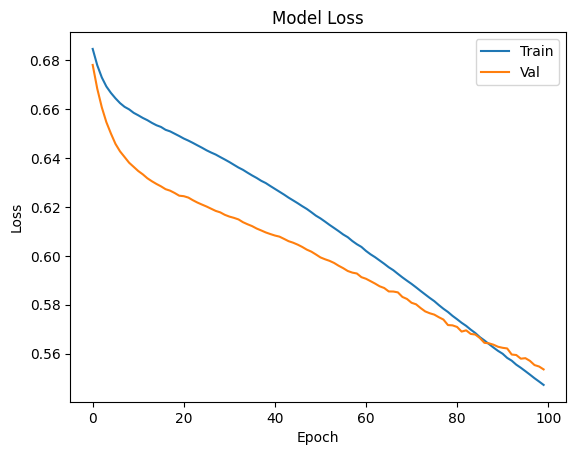

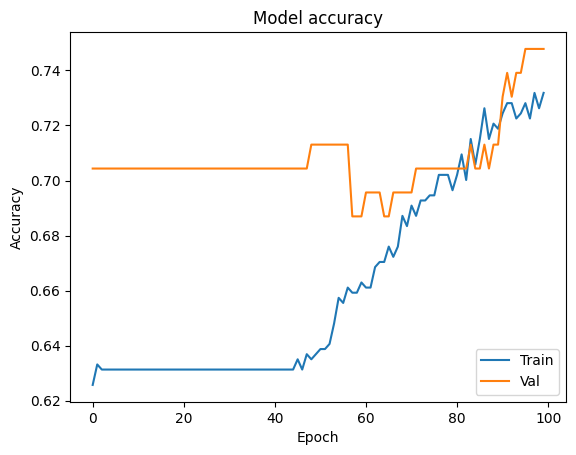

In [19]:
import matplotlib.pyplot as plt

# For validation loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#For model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()


Much of what's done to create such a graph is understood at first sight, but what might be somewhat confusing is how loss, val_loss, and accuracy, val_accuracy is gained from the history of 'hist': this suggest that setting such a metric at compile time like accuracy and loss will produce not just one type of metric but rather multiple, like that of 'loss' and 'val_loss'. 

* Regularization
After running the oringal model without regularization, I should look to see how it would be if it were added to it: finding the refinmenet.

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4953 - loss: 1.1371 - val_accuracy: 0.6087 - val_loss: 1.1249
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4693 - loss: 1.1313 - val_accuracy: 0.7043 - val_loss: 1.1101
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5810 - loss: 1.1170 - val_accuracy: 0.7043 - val_loss: 1.0981
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6127 - loss: 1.1147 - val_accuracy: 0.7043 - val_loss: 1.0882
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5996 - loss: 1.1059 - val_accuracy: 0.7043 - val_loss: 1.0799
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6331 - loss: 1.0989 - val_accuracy: 0.7043 - val_loss: 1.0731
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6201 - loss: 1.0908 - val_accuracy: 0.7043 - val_loss: 1.0659
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6313 - loss: 1.0875 - val_accuracy: 0.7043 -

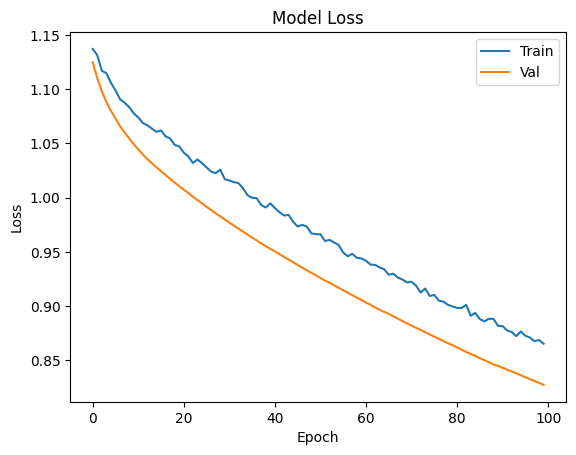

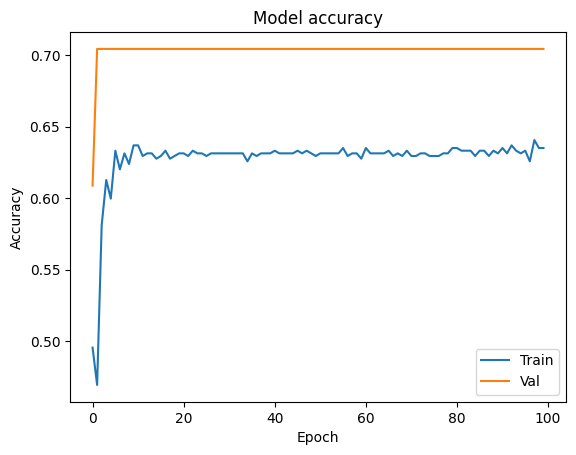

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from keras.layers import Dropout
from keras import regularizers

model = Sequential([
    Dense(32, activation='relu', input_shape=(8,), kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist = model.fit(X_train, Y_train,
                 batch_size=32, epochs=100,
                 validation_data=(X_val, Y_val))
                 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()